Este notebook tem, como intuito, analisar características e desempenho dos modelos utilizados pelo grupo de CV (Computer Vision) na 3ª rotação da [TAIL](https://github.com/TailUFPB). Esses modelos serão utilizados para criação de um jogo, onde temos um texto, escrito por um usuário, e convertido para uma imagem. Mais informações sobre o projeto serão colocadas, neste notebook, posteriormente.

# Bibliotecas

In [1]:
import matplotlib.pyplot as plt
from datetime import datetime
import pandas as pd

# Leitura e checagem da planilha

In [2]:
df = pd.read_excel('images-data.xlsx')

In [3]:
df.dtypes

Text Input                   object
Model                        object
No. of Iterations           float64
No. of Epochs               float64
Execution Time       datetime64[ns]
No. of Layers               float64
Result                        int64
dtype: object

In [4]:
df

,Text Input,Model,No. of Iterations,No. of Epochs,Execution Time,No. of Layers,Result
0,"""brazil 7-1""",Big Sleep,417.0,NaN,2018-02-20 00:41:45,NaN,1
1,"""seal swimming""",Big Sleep,634.0,NaN,2018-02-20 01:02:45,NaN,3
2,"""jake paul vs tyron woodley",Big Sleep,397.0,NaN,2018-02-20 00:39:16,NaN,1
3,"""cristiano ronaldo dancing""",Deep Daze,542.0,0.0,2018-02-20 02:24:10,32.0,2
4,"""a samurai training""",Deep Daze,121.0,0.0,2018-02-20 00:24:38,24.0,4
5,"""send save""",Deep Daze,257.0,0.0,2018-02-20 00:30:00,24.0,1
6,"""monkey eating banana""",Deep Daze,256.0,0.0,2018-02-20 00:49:26,24.0,5
7,"""rock lee linkin park",Deep Daze,179.0,0.0,2018-02-20 00:36:11,24.0,3
8,"""travis scott in fortnite""",Deep Daze,121.0,0.0,2018-02-20 00:24:48,24.0,1
9,"""liliana of the veil""",Deep Daze,202.0,0.0,2018-02-20 00:41:00,24.0,4


# Declaração dos modelos

Armazenamos os nomes dos modelos em uma string, para facilitar a manipulação:

In [5]:
uniqueValues = ['Big Sleep', 'Deep Daze', 'VQGAN + CLIP']

# Cálculos para análise

Abaixo, criamos três variáveis para armazenarmos a média da quantidade de iterações, para cada tipo de modelo e armazenamos em uma lista:

In [6]:
average_iter_bs = (df['No. of Iterations'][df['Model'] == 'Big Sleep'].mean())
average_iter_dd = (df['No. of Iterations'][df['Model'] == 'Deep Daze'].mean())
average_iter_vc = (df['No. of Iterations'][df['Model'] == 'VQGAN + CLIP'].mean())

In [7]:
average_iter = [average_iter_bs, average_iter_dd, average_iter_vc]

In [8]:
average_iter

[482.6666666666667, 244.5, 7000.0]

In [9]:
average_grade_bs = (df['Result'][df['Model'] == 'Big Sleep'].mean())
average_grade_dd = (df['Result'][df['Model'] == 'Deep Daze'].mean())
average_grade_vc = (df['Result'][df['Model'] == 'VQGAN + CLIP'].mean())

In [10]:
average_grade = [average_grade_bs, average_grade_dd, average_grade_vc]

In [11]:
average_grade

[1.6666666666666667, 2.9, 2.6666666666666665]

Com a mesma lógica, armazenamos a média do tempo de execução, para cada tipo de modelo. Em seguida, armazenamos este em uma lista e verificamos a integridade das operações feitas:

In [12]:
average_exec_bs = (df['Execution Time'][df['Model'] == 'Big Sleep'].mean())
average_exec_dd = (df['Execution Time'][df['Model'] == 'Deep Daze'].mean())
average_exec_vc = (df['Execution Time'][df['Model'] == 'VQGAN + CLIP'].mean())

In [13]:
average_exec = [average_exec_bs, average_exec_dd, average_exec_vc]

In [14]:
average_exec

[Timestamp('2018-02-20 00:47:55.333333248'),
 Timestamp('2018-02-20 01:00:03.700000'),
 Timestamp('2018-02-20 04:40:00')]

Em seguida, transformamos os tipos timestamp em números, representados em segundos. Após esta operação, transformamos de segundo para minuto e armazenamos os valores em uma lista e conferimos a integridade das operações:

In [15]:
for i in range(3):
    if i == 0:
        seconds_dd = (average_exec[i].hour * 60 + average_exec[i].minute) * 60 + average_exec[i].second
    if i == 1:
        seconds_bs = (average_exec[i].hour * 60 + average_exec[i].minute) * 60 + average_exec[i].second
    if i == 2:
        seconds_vc = (average_exec[i].hour * 60 + average_exec[i].minute) * 60 + average_exec[i].second

In [16]:
average_exec_time = [(seconds_dd)/60, (seconds_bs)/60, (seconds_vc)/60]

In [17]:
average_exec_time

[47.916666666666664, 60.05, 280.0]

# Plots

O primeiro plot indica a média das iterações de cada modelo:

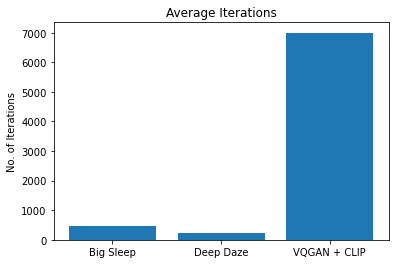

In [18]:
fig, ax = plt.subplots()
ax.set_ylabel('No. of Iterations')
ax.set_title('Average Iterations')
plt.bar(uniqueValues, average_iter);

E o segundo indica a média do tempo de execução de cada modelo:

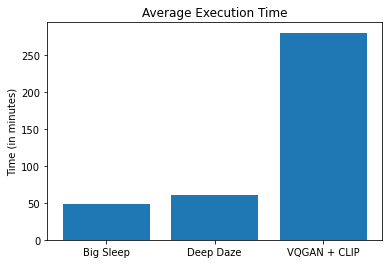

In [19]:
fig, ax = plt.subplots()
ax.set_ylabel('Time (in minutes)')
ax.set_title('Average Execution Time')
plt.bar(uniqueValues, average_exec_time);

E o terceiro indica a média da qualidade (avaliada pelos integrantes), de 1 a 5, da imagem gerada pelos modelos:

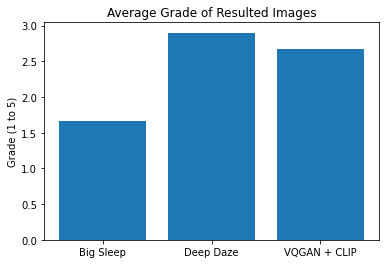

In [20]:
fig, ax = plt.subplots()
ax.set_ylabel('Grade (1 to 5)')
ax.set_title('Average Grade of Resulted Images')
plt.bar(uniqueValues, average_grade);